In [ ]:
#!pip install gdown

In [ ]:
import pandas as pd
import numpy as np

# для работы с датами, временем
from datetime import timedelta
import datetime as dt

# для построения графиков
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
import gdown

In [ ]:
url = 'https://github.com/izosenkov/hw_business/raw/main/accept%20(1).csv'
output = 'accept%20(1).csv'
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

accept = pd.read_csv('accept%20(1).csv')

####

url = 'https://raw.githubusercontent.com/izosenkov/hw_business/main/reject%20(1).csv'
output = 'reject%20(1).csv'
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

reject = pd.read_csv('reject%20(1).csv')

Downloading...
From: https://github.com/izosenkov/hw_business/raw/main/accept%20(1).csv
To: /content/accept%20(1).csv
3.02MB [00:00, 125MB/s]                   
Downloading...
From: https://raw.githubusercontent.com/izosenkov/hw_business/main/reject%20(1).csv
To: /content/reject%20(1).csv
946kB [00:00, 71.9MB/s]                   


### Exploratory Data Analysis

 - target - целевая переменная (1- клиент достиг просрочку 90 дней в первый год кредита, 0 - иначе)
 - INCOME_TYPE - тип подтверждения дохода
 - EDUCATION_ - образование
 - CUSTOMER_CATEGORY_ - категория клиента
 - income - доход клиента
 - DEPENDANT_NUMBER - количество иждевенцев
 - IS_EMPL - это сотрудник банка
 - COUNT_ACTIVE_CREDIT_NO_CC - количество октрытых кредитов без учета кредитных карт
 - CNT_MNTH_FROM_LAST_PMNT - сколько месяцев прошло с момента последнего платежа по предудущему кредиту
 - age - возраст клиента
 - experience - стаж клиента
 - inquiry_14_day - количество запросов в бюро кредитных историй за последние 14 дней
 - inquiry_21_day - количество запросов в бюро кредитных историй за последние 21 день
 - count_mnth_act_passport - сколько месяцев прошло с момента выдачи выдачи паспорта
 - UID - ID заявки

In [ ]:
accept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32554 entries, 0 to 32553
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   target                     32554 non-null  int64  
 1   INCOME_TYPE                32554 non-null  object 
 2   EDUCATION_                 32554 non-null  object 
 3   CUSTOMER_CATEGORY_         13095 non-null  object 
 4   income                     31901 non-null  float64
 5   DEPENDANT_NUMBER           32514 non-null  float64
 6   IS_EMPL                    32554 non-null  int64  
 7   COUNT_ACTIVE_CREDIT_NO_CC  24190 non-null  float64
 8   CNT_MNTH_FROM_LAST_PMNT    22409 non-null  float64
 9   age                        32554 non-null  float64
 10  experience                 32507 non-null  float64
 11  inquiry_14_day             23333 non-null  float64
 12  inquiry_21_day             23333 non-null  float64
 13  count_mnth_act_passport    32554 non-null  flo

#### Пропуски и выбросы

<Axes: xlabel='переменная', ylabel='Количество пропусков'>

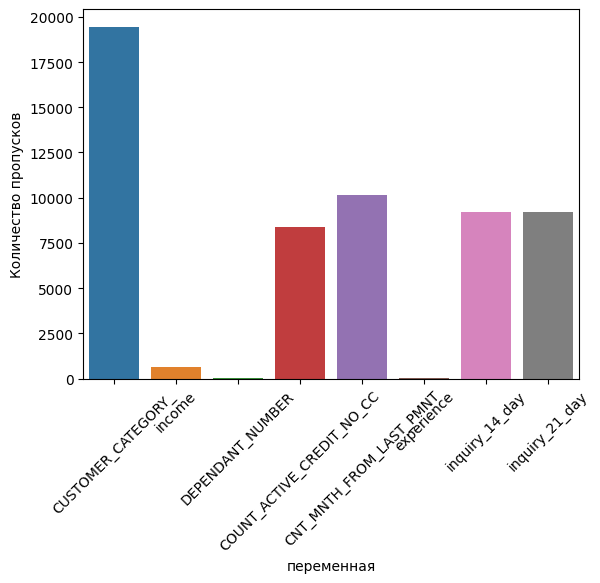

In [ ]:
nulls= pd.DataFrame(accept.isnull().sum(), columns=['Количество пропусков'])
nulls['переменная'] = nulls.index
plt.xticks(rotation=45)
sns.barplot(data=nulls[nulls['Количество пропусков']>0], x='переменная', y='Количество пропусков')

График хорошо показывает природу пропусков, здесь ключевой показатель - COUNT_ACTIVE_CREDIT_NO_CC - количество октрытых кредитов без учета кредитных карт.
В выборке присутствует фактически не клиенты банка, у котороых нет открытых кредитов - поэтому и другие показатели - inquiry_14_day, inquiry_21_day и т д тоже имеют пропуски по этим "не клиентем."

Пропуски в категории клиента заменим значением "базовая категория".

<Axes: xlabel='CUSTOMER_CATEGORY_', ylabel='count'>

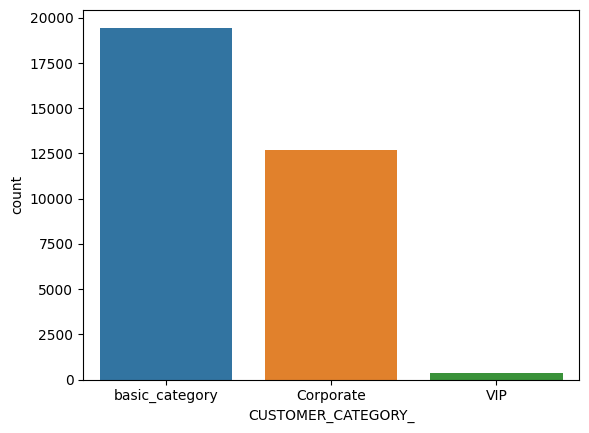

In [ ]:
accept['CUSTOMER_CATEGORY_']=accept['CUSTOMER_CATEGORY_'].fillna('basic_category')
sns.countplot(data=accept, x='CUSTOMER_CATEGORY_')

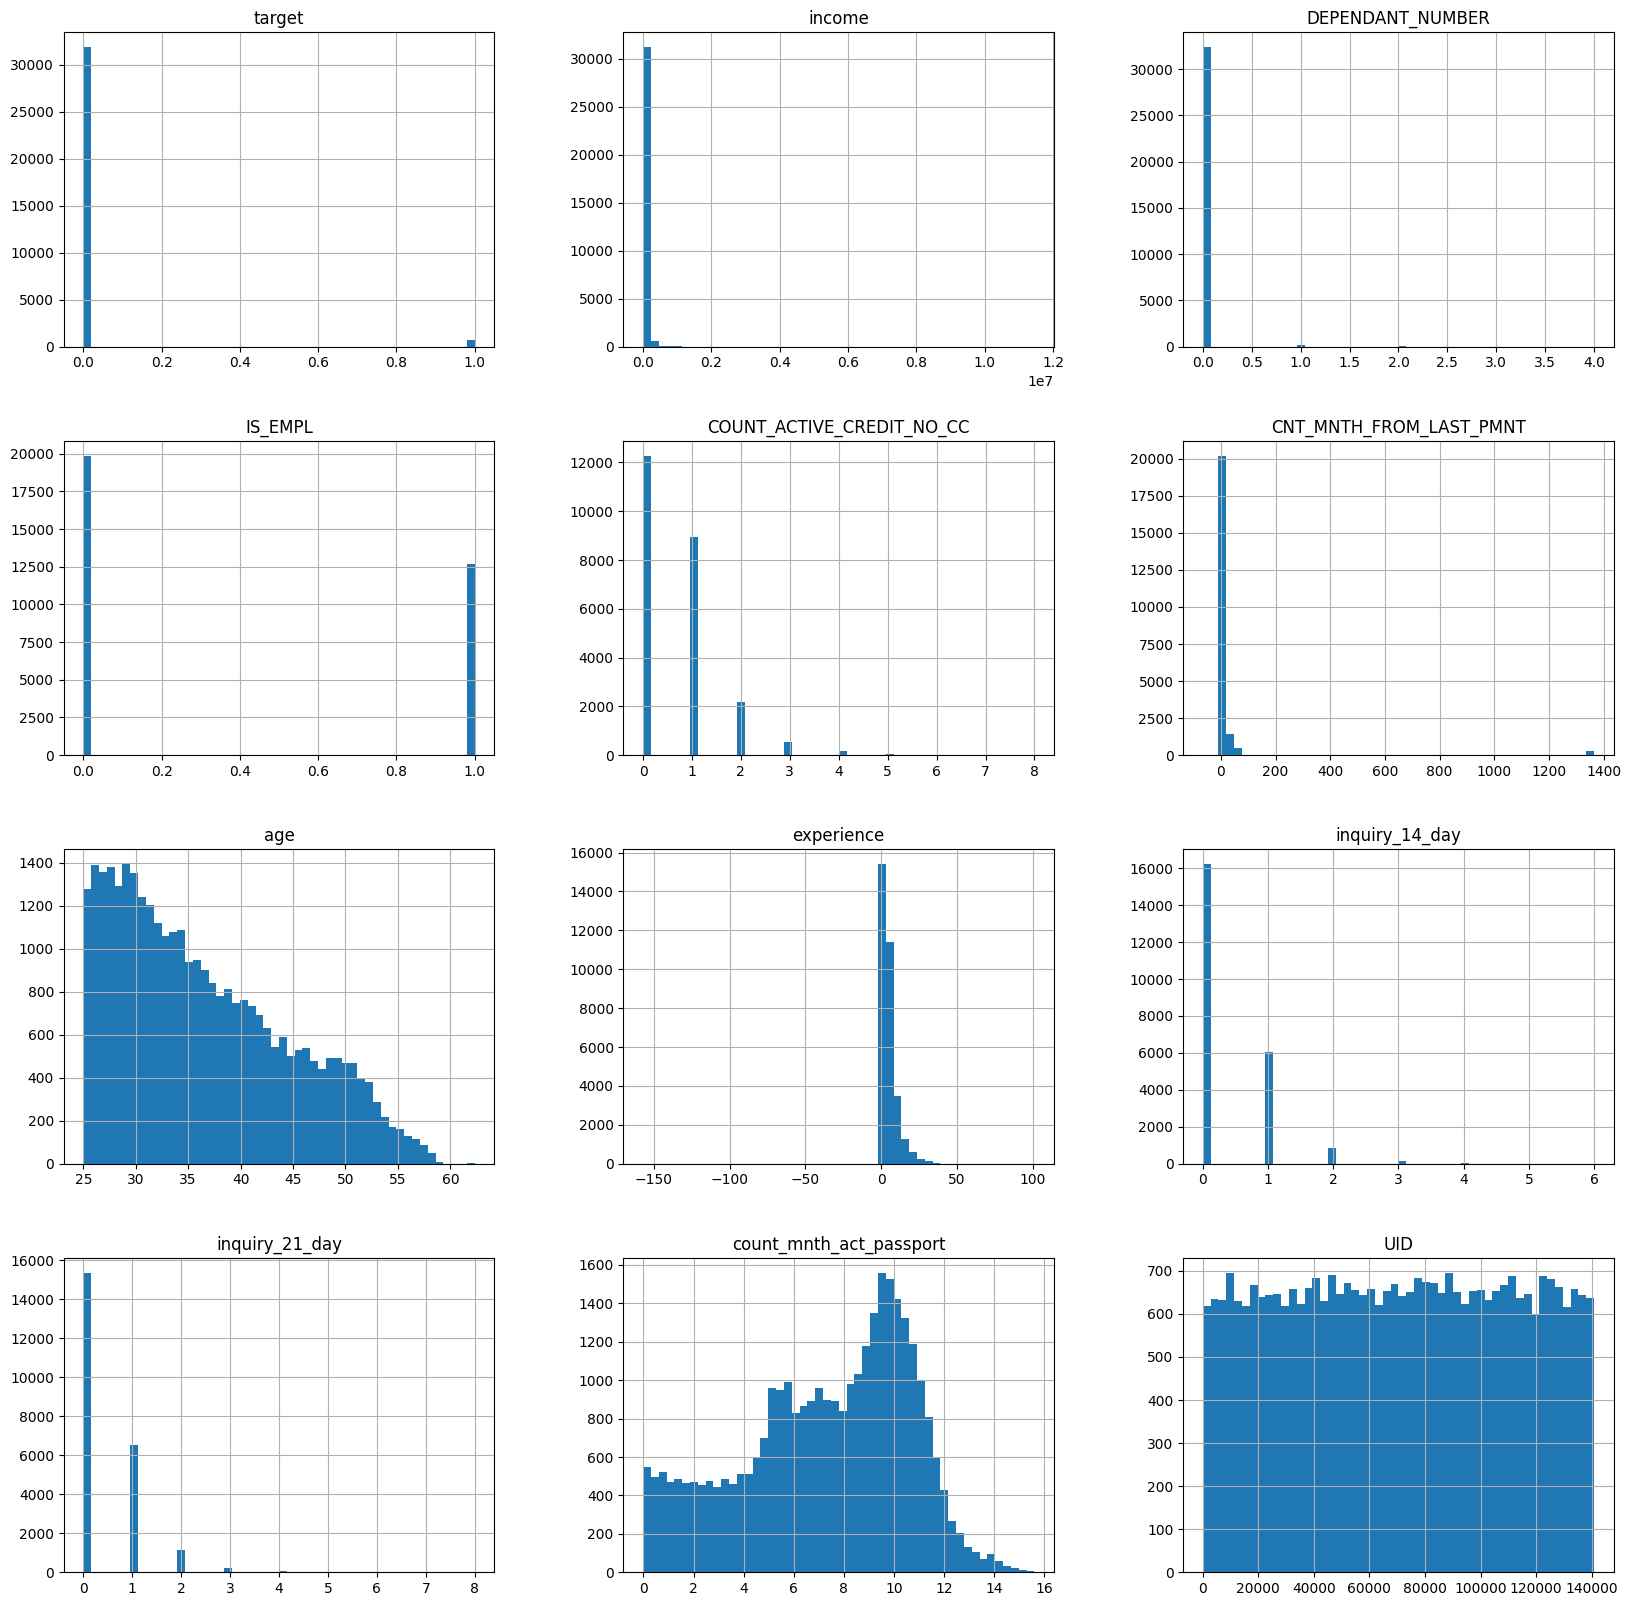

In [ ]:
accept.hist(figsize = (20, 20), bins=50);

In [ ]:
accept.select_dtypes([np.number]).columns[(accept.select_dtypes([np.number]) < 0).any()]

Index(['CNT_MNTH_FROM_LAST_PMNT', 'experience', 'count_mnth_act_passport'], dtype='object')

Эти колонки содержат отрицательные значения.Заменим мусорные значения на nа

In [ ]:
accept['count_mnth_act_passport']=np.where(accept['count_mnth_act_passport'] <0, np.NaN,accept['count_mnth_act_passport'] )

accept['experience']=np.where((accept['experience'] <0) & ( accept['experience'] >60), np.NaN,accept['experience'])
accept['CNT_MNTH_FROM_LAST_PMNT']=np.where(accept['CNT_MNTH_FROM_LAST_PMNT'] <0, np.NaN, accept['CNT_MNTH_FROM_LAST_PMNT'])

In [ ]:
accept.select_dtypes([np.number]).columns[(accept.select_dtypes([np.number]) < 0).any()]

Index(['experience'], dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'target'),
  Text(1, 0, 'income'),
  Text(2, 0, 'DEPENDANT_NUMBER'),
  Text(3, 0, 'IS_EMPL'),
  Text(4, 0, 'COUNT_ACTIVE_CREDIT_NO_CC'),
  Text(5, 0, 'CNT_MNTH_FROM_LAST_PMNT'),
  Text(6, 0, 'age'),
  Text(7, 0, 'experience'),
  Text(8, 0, 'inquiry_14_day'),
  Text(9, 0, 'inquiry_21_day'),
  Text(10, 0, 'count_mnth_act_passport'),
  Text(11, 0, 'UID')])

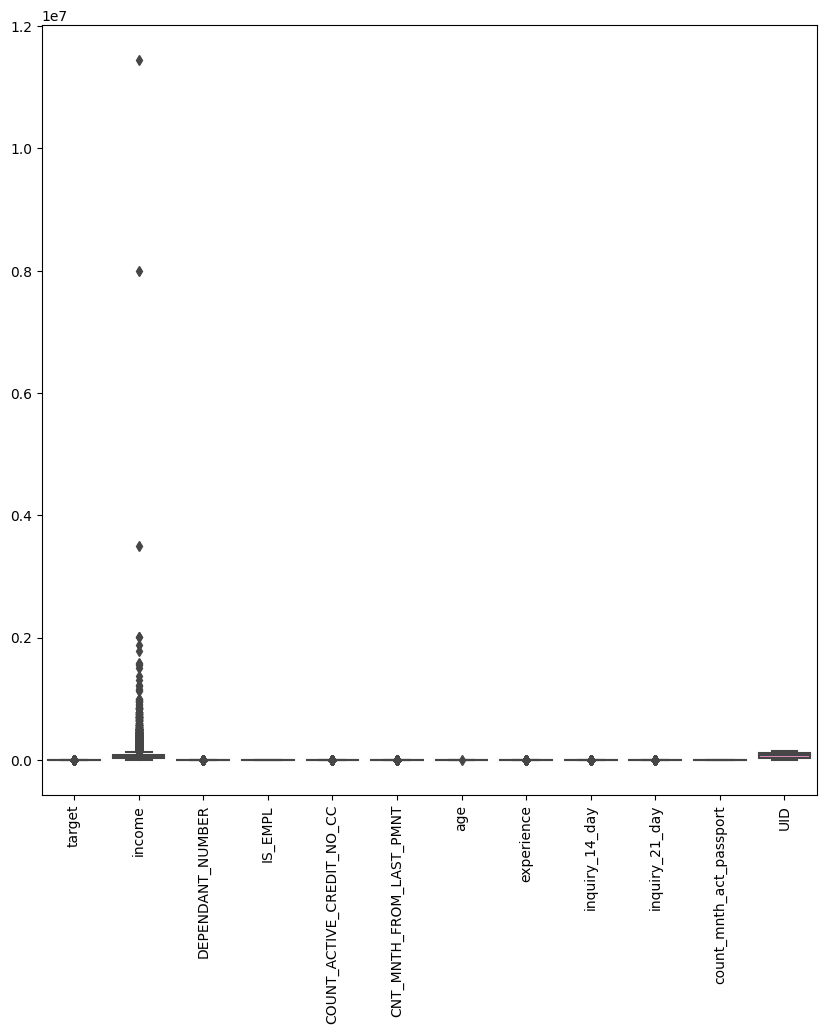

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=accept.select_dtypes([np.number]));
plt.xticks(rotation=90)

Теперь заменим na на средние

In [ ]:
accept['count_mnth_act_passport'] = accept['count_mnth_act_passport'].fillna(accept['count_mnth_act_passport'].mean())
accept['CNT_MNTH_FROM_LAST_PMNT'] = accept['CNT_MNTH_FROM_LAST_PMNT'].fillna(accept['CNT_MNTH_FROM_LAST_PMNT'].mean())
accept['COUNT_ACTIVE_CREDIT_NO_CC'] = accept['COUNT_ACTIVE_CREDIT_NO_CC'].fillna(accept['COUNT_ACTIVE_CREDIT_NO_CC'].mean())
accept['inquiry_21_day'] = accept['inquiry_21_day'].fillna(accept['inquiry_21_day'].mean())
accept['inquiry_14_day'] = accept['inquiry_14_day'].fillna(accept['inquiry_14_day'].mean())
accept['DEPENDANT_NUMBER'] = accept['DEPENDANT_NUMBER'].fillna(accept['DEPENDANT_NUMBER'].mean())
accept['income'] = accept['income'].fillna(accept['income'].mean())
accept['CNT_MNTH_FROM_LAST_PMNT'] = accept['CNT_MNTH_FROM_LAST_PMNT'].fillna(accept['CNT_MNTH_FROM_LAST_PMNT'].mean())

#### Целевая переменная

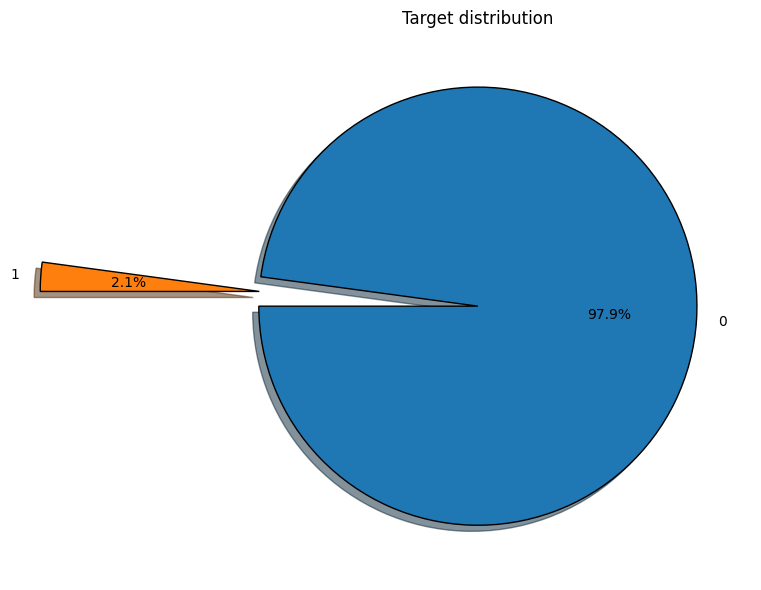

In [ ]:
plt.figure(figsize=(8,6))

slices = accept.target.value_counts()
labels = accept.target.value_counts().reset_index()['index']
explode = accept.target.value_counts().reset_index()['index']

plt.pie(slices,
        labels=labels,
        explode=explode,
        shadow=True,
        startangle=180,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor':'black'}
        )


plt.title('Target distribution')
plt.tight_layout()

plt.show()

Лишь 2.1 % клиентов достигли просрочку 90 дней в первый год кредита.Целевая переменная распределена очень не равномерна, *SMOTE* или *Nearmiss* могут уравновесить классы. Без этого стандарные метрики (accuracy, precision , recall) подойдут не очень в приниципе - дисбаланс приведет к тому, что значенияaccuracy presicion и recall взлетят - сильный перевес в пользу True Positive. Но это не означает, что мы все врено предскажем.

Лучше использовать:
[Marco F1](https://stephenallwright.com/micro-vs-macro-f1-score/) score -невзвешенное среднее значений оценок F1, рассчитанных для **каждого класса**. Так и учтем несбалансированность

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.6619264158743282'),
  Text(2, 0, '1.0'),
  Text(3, 0, '2.0'),
  Text(4, 0, '3.0'),
  Text(5, 0, '4.0'),
  Text(6, 0, '5.0'),
  Text(7, 0, '6.0'),
  Text(8, 0, '7.0'),
  Text(9, 0, '8.0')])

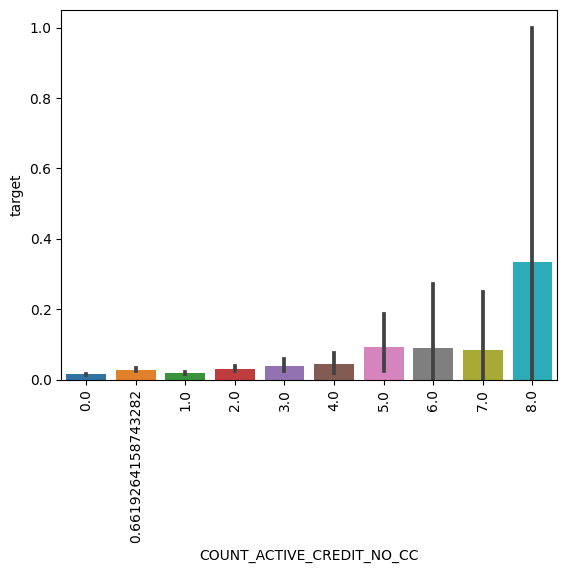

In [ ]:
sns.barplot(data=accept,x='COUNT_ACTIVE_CREDIT_NO_CC', y='target')
plt.xticks(rotation=90)

C ростом количества октрытых кредитов без учета кредитных карт растет вероятность просрочки, превышающей 90 дней в первый год кредита

#### Схлопывание сильно скоррелированных переменных в одну

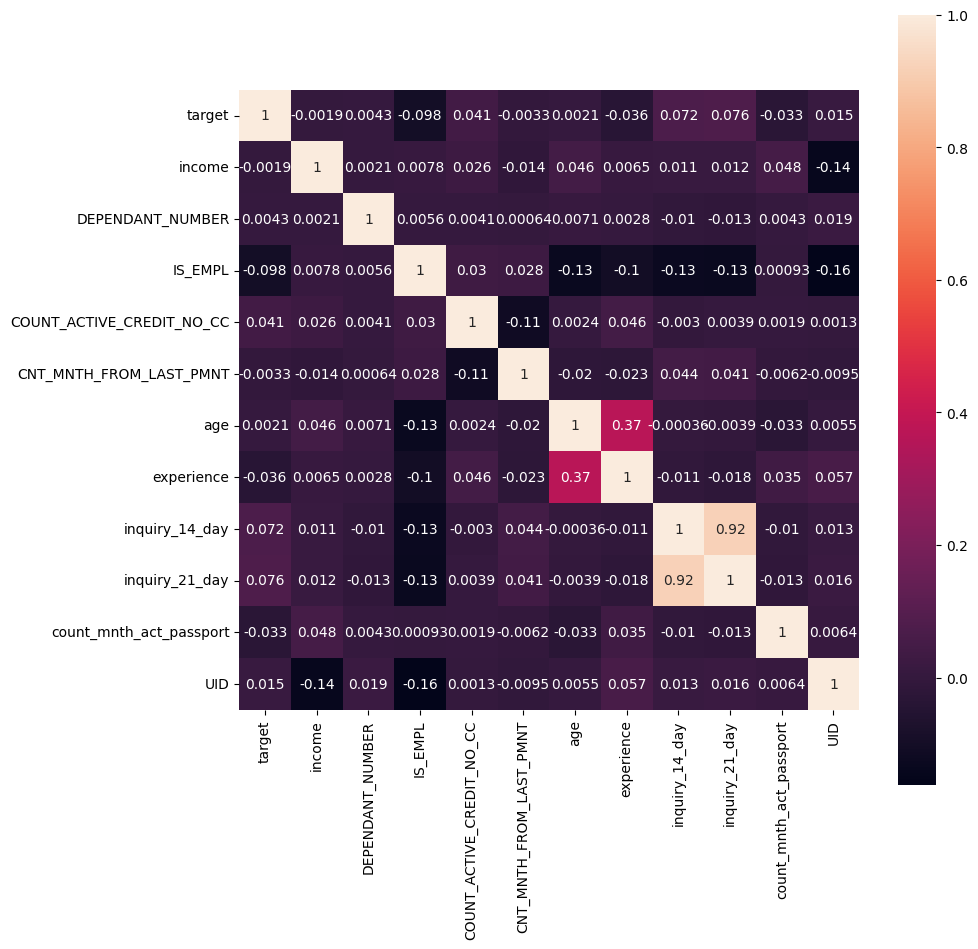

In [ ]:
correlations = accept.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlations, square=True, annot=True)
plt.show()

 - inquiry_14_day и inquiry_21_day сильно коррелируют (кор Пирсона = 0.922379), возраст и опыт работы (кор Пирсона = 0.37)
 - наиболее сильно скоррелирован с целевой переменной столбец IS_EMPL - статус сотрудника банка уменьшает шанс одобрения. Также эта переменная имеет отрицательную корреляцию с опытом

In [ ]:
X=accept[['inquiry_14_day','inquiry_21_day']].fillna(0)

from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.96171079]


Первая компонента сожержит более 96% вариации двух переменных, потеря вариации незначительна, можем брать

In [ ]:
from sklearn.decomposition import PCA
PCA_model = PCA(n_components=1,random_state=42) # We reduce the dimensionality to two dimensions and set the
                                                            # random state to 42
accept['inquiry']= PCA_model.fit_transform(X)

accept =  accept.drop(['inquiry_14_day','inquiry_21_day'], axis=1)

<Axes: xlabel='ratio_experience', ylabel='Count'>

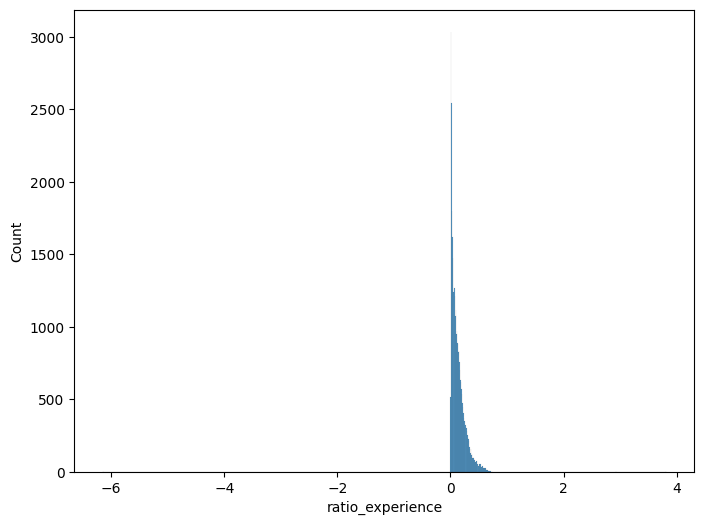

In [ ]:

accept['ratio_experience'] = accept['experience']/accept['age']

plt.figure(figsize=(8,6))
sns.histplot(data=accept,x='ratio_experience')

#### Превращение категориальных переменных в дамми

In [ ]:
accept = pd.get_dummies(accept, columns=['INCOME_TYPE', 'EDUCATION_', 'CUSTOMER_CATEGORY_'])

In [ ]:
accept2 = accept.copy(deep=True)

In [ ]:
accept.shape

(32554, 21)

### Модель

In [ ]:
accept.dtypes

target                                 int64
income                               float64
DEPENDANT_NUMBER                     float64
IS_EMPL                                int64
COUNT_ACTIVE_CREDIT_NO_CC            float64
CNT_MNTH_FROM_LAST_PMNT              float64
age                                  float64
experience                           float64
count_mnth_act_passport              float64
UID                                    int64
inquiry                              float64
ratio_experience                     float64
INCOME_TYPE_2NDFL                      uint8
INCOME_TYPE_OTHER                      uint8
EDUCATION__advanced                    uint8
EDUCATION__beginner                    uint8
EDUCATION__elementary                  uint8
EDUCATION__high                        uint8
CUSTOMER_CATEGORY__Corporate           uint8
CUSTOMER_CATEGORY__VIP                 uint8
CUSTOMER_CATEGORY__basic_category      uint8
dtype: object

In [ ]:
# интервальные переменные
interval_features = accept.select_dtypes(include=['float64', 'int64']).columns.tolist()
interval_features.remove('target')
interval_features.remove('UID')
interval_features.remove('IS_EMPL')
interval_features.remove('DEPENDANT_NUMBER')
interval_features

['income',
 'COUNT_ACTIVE_CREDIT_NO_CC',
 'CNT_MNTH_FROM_LAST_PMNT',
 'age',
 'experience',
 'count_mnth_act_passport',
 'inquiry',
 'ratio_experience']

In [ ]:
categorical_features = accept.select_dtypes(include=['object']).columns.tolist()
categorical_features = categorical_features+['IS_EMPL']+['DEPENDANT_NUMBER']
categorical_features

['IS_EMPL', 'DEPENDANT_NUMBER']

In [ ]:
# преобразование WOE из семинарской тетрали
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })

    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()

    dset = dset.sort_values(by='WoE')

    return dset, iv

In [ ]:
for feature in interval_features:
    accept[feature + '_bin'] = pd.qcut(accept[feature], 20, duplicates='drop')
    accept[feature + '_bin'] = accept[feature + '_bin'].cat.add_categories("0-0").fillna("0-0")

for feature in categorical_features:
    accept[feature] = accept[feature].fillna("0-0")

In [ ]:
for feature in interval_features:
    print(f'{feature}' + '_bin', end=' ')
    intervals = accept[feature + '_bin'].value_counts()


    print(len(intervals), intervals, sep='\n')
    print('_____________________________ \n ########################')

income_bin 21
(27000.0, 30000.0]        2118
(56411.35, 61331.771]     2054
(46185.15, 50000.0]       1725
(24972.0, 27000.0]        1648
(32334.2, 35000.0]        1647
(116399.0, 158529.0]      1629
(21901.95, 24972.0]       1629
(69129.25, 79957.0]       1629
(-0.001, 15698.3]         1628
(92849.05, 116399.0]      1628
(42281.0, 46185.15]       1628
(15698.3, 19302.6]        1628
(39223.0, 42281.0]        1627
(79957.0, 92849.05]       1627
(19302.6, 21901.95]       1627
(158529.0, 11450378.0]    1626
(35000.0, 39223.0]        1609
(50000.0, 56411.35]       1530
(61331.771, 69129.25]     1201
(30000.0, 32334.2]        1116
0-0                          0
Name: income_bin, dtype: int64
_____________________________ 
 ########################
COUNT_ACTIVE_CREDIT_NO_CC_bin 5
(-0.001, 0.662]    20637
(0.662, 1.0]        8942
(1.0, 2.0]          2194
(2.0, 8.0]           781
0-0                    0
Name: COUNT_ACTIVE_CREDIT_NO_CC_bin, dtype: int64
_____________________________ 
 ########

In [ ]:
from sklearn.model_selection import train_test_split
train, test, y_train, y_test = train_test_split(accept,
                                                accept['target'],
                                                test_size=0.2,
                                                random_state=42,
                                                stratify=(accept['target']))



In [ ]:
scorecard = pd.DataFrame()

In [ ]:
for feature in interval_features:

    df, iv = calculate_woe_iv(train, feature + '_bin', 'target')
    df['feature'] = feature

    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value')
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})

    train = train.drop(columns = [feature, feature + '_bin', 'Value'])

    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})



    test = test.drop(columns = [feature, feature + '_bin', 'Value'])



#     test['WoE'+'_'+feature + '_bin'] = pd.qcut(test['WoE'+'_'+feature], 7, duplicates='drop')

    scorecard = pd.concat([scorecard, df[['feature', 'Value', 'WoE']]])
    print('feature', feature, '  IV= ',iv)

feature income   IV=  0.1875562001148775
feature COUNT_ACTIVE_CREDIT_NO_CC   IV=  0.049925241484986414
feature CNT_MNTH_FROM_LAST_PMNT   IV=  0.13625783525424243
feature age   IV=  0.04036082004726361
feature experience   IV=  0.5230094242011327
feature count_mnth_act_passport   IV=  0.06600362926826432
feature inquiry   IV=  0.09197539594559707
feature ratio_experience   IV=  0.5140057597739834


In [ ]:
len(train)

26043

In [ ]:
# bins = ['WoE' + '_' + i + '_bin' for i in interval_features]

In [ ]:
for feature in categorical_features:
    df, iv = calculate_woe_iv(train, feature , 'target')
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})
    train = train.drop(columns = [feature, 'Value'])

    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})
    test = test.drop(columns = [feature, 'Value'])
    scorecard = pd.concat([scorecard, df[['feature', 'Value', 'WoE']]])


    print('feature', feature, '  IV= ',iv)

feature IS_EMPL   IV=  0.7722695553208109
feature DEPENDANT_NUMBER   IV=  0.3617949539333003


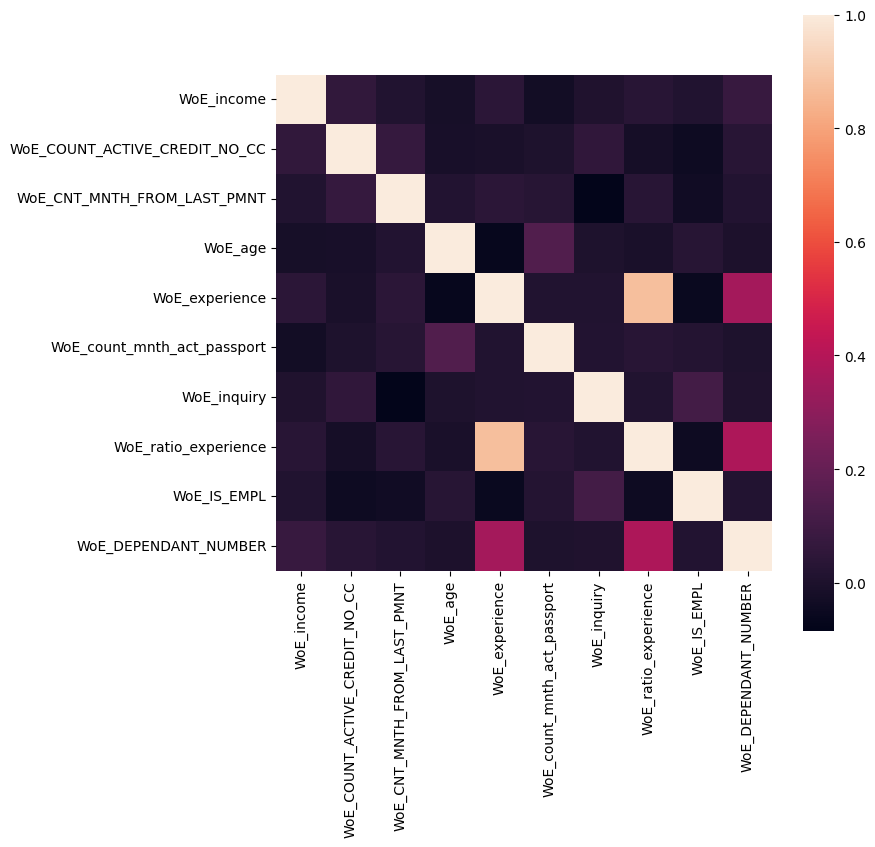

In [ ]:
correlations_woe = train.select_dtypes(include=['float64']).corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlations_woe, square=True)
plt.show()

In [ ]:
features = test.columns.tolist()
features.remove('UID')
features.remove('target')
# исключаем, так как IV<0.02

features.remove('WoE_age')

# исключим inquiry_14_day, так inquiry_14_day коррелирует с inquiry_21_day,
# при этом IV у inquiry_21_day выше


# исключаем WoE_CUSTOMER_CATEGORY_, так как коррелирует WoE_is_EMPL


# исключаем так как коррелирует experience с ratio_experience
features.remove('WoE_experience')

features



['INCOME_TYPE_2NDFL',
 'INCOME_TYPE_OTHER',
 'EDUCATION__advanced',
 'EDUCATION__beginner',
 'EDUCATION__elementary',
 'EDUCATION__high',
 'CUSTOMER_CATEGORY__Corporate',
 'CUSTOMER_CATEGORY__VIP',
 'CUSTOMER_CATEGORY__basic_category',
 'WoE_income',
 'WoE_COUNT_ACTIVE_CREDIT_NO_CC',
 'WoE_CNT_MNTH_FROM_LAST_PMNT',
 'WoE_count_mnth_act_passport',
 'WoE_inquiry',
 'WoE_ratio_experience',
 'WoE_IS_EMPL',
 'WoE_DEPENDANT_NUMBER']

In [ ]:
train.columns

Index(['target', 'UID', 'INCOME_TYPE_2NDFL', 'INCOME_TYPE_OTHER',
       'EDUCATION__advanced', 'EDUCATION__beginner', 'EDUCATION__elementary',
       'EDUCATION__high', 'CUSTOMER_CATEGORY__Corporate',
       'CUSTOMER_CATEGORY__VIP', 'CUSTOMER_CATEGORY__basic_category',
       'WoE_income', 'WoE_COUNT_ACTIVE_CREDIT_NO_CC',
       'WoE_CNT_MNTH_FROM_LAST_PMNT', 'WoE_age', 'WoE_experience',
       'WoE_count_mnth_act_passport', 'WoE_inquiry', 'WoE_ratio_experience',
       'WoE_IS_EMPL', 'WoE_DEPENDANT_NUMBER'],
      dtype='object')

In [ ]:
features

['INCOME_TYPE_2NDFL',
 'INCOME_TYPE_OTHER',
 'EDUCATION__advanced',
 'EDUCATION__beginner',
 'EDUCATION__elementary',
 'EDUCATION__high',
 'CUSTOMER_CATEGORY__Corporate',
 'CUSTOMER_CATEGORY__VIP',
 'CUSTOMER_CATEGORY__basic_category',
 'WoE_income',
 'WoE_COUNT_ACTIVE_CREDIT_NO_CC',
 'WoE_CNT_MNTH_FROM_LAST_PMNT',
 'WoE_count_mnth_act_passport',
 'WoE_inquiry',
 'WoE_ratio_experience',
 'WoE_IS_EMPL',
 'WoE_DEPENDANT_NUMBER']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train = train[features]
X_test = test[features]
y_train = train['target']
y_test = test['target']

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
features_coefs = pd.DataFrame(zip(X_train.columns, np.transpose(logreg.coef_.tolist()[0])),
                              columns=['features', 'coef'])

intercept = logreg.intercept_
print('intercept=', intercept)
features_coefs

intercept= [-4.12157548]


,features,coef
0,INCOME_TYPE_2NDFL,-0.485269
1,INCOME_TYPE_OTHER,0.483580
2,EDUCATION__advanced,0.344087
3,EDUCATION__beginner,-0.303162
4,EDUCATION__elementary,-0.207931
5,EDUCATION__high,0.165316
6,CUSTOMER_CATEGORY__Corporate,-0.010935
7,CUSTOMER_CATEGORY__VIP,-0.269201
8,CUSTOMER_CATEGORY__basic_category,0.278447
9,WoE_income,-0.637104


In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


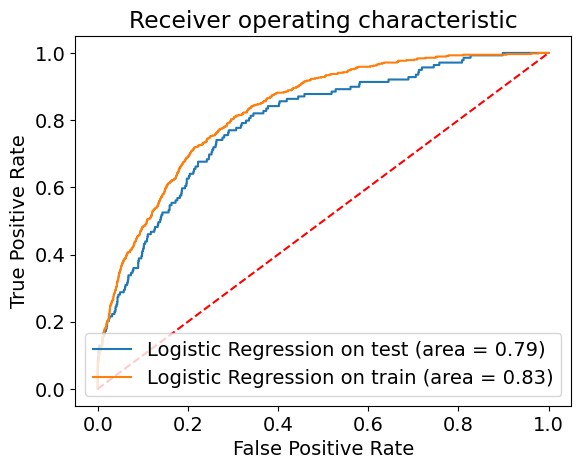

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
plt.rc("font", size=14)


logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])



logit_roc_auc_train = roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression on test (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr_train, tpr_train, label='Logistic Regression on train (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
gmeans = np.sqrt(tpr + (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.020805, G-Mean=1.227


In [ ]:
cutoff = thresholds[ix]
predictions_01 = np.where(logreg.predict_proba(X_test)[:,1] > cutoff, 1, 0) #Turn probability to 0-1 binary output



In [ ]:
test['predictions_01'] = [el for el in predictions_01]

<Figure size 640x480 with 0 Axes>

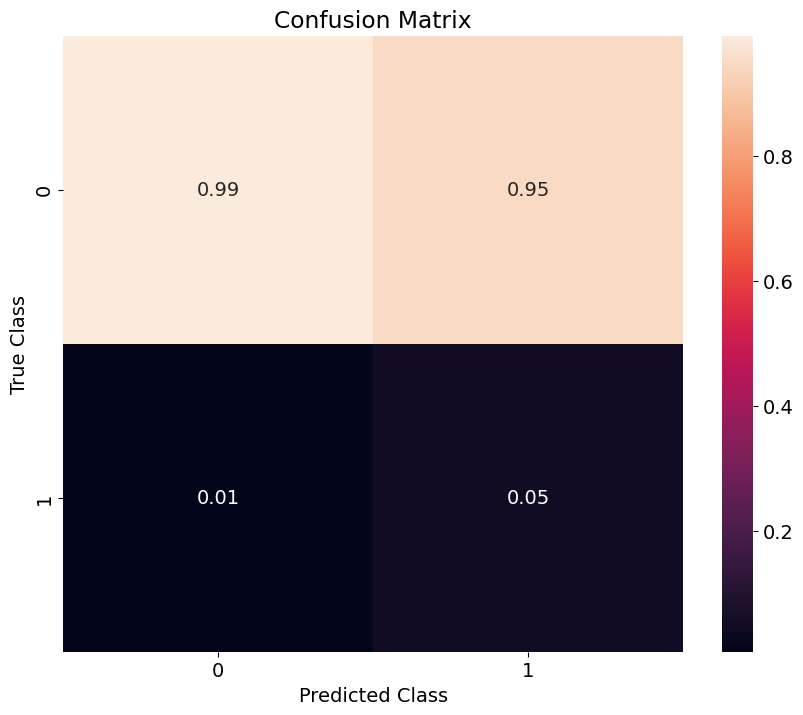

In [ ]:
from sklearn.metrics import confusion_matrix


#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, test['predictions_01'], normalize='pred')
labels = ['0', '1']
plt.figure(figsize=(10,8))
sns.heatmap(cm,
            xticklabels = labels,
            yticklabels = labels,
            annot = True,
            # fmt='d',
            fmt=".2f",
            # cmap="",
            # vmin = 0.1
            );
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score
print('precision:', precision_score(test['predictions_01'], y_test))
print('recall:', recall_score(test['predictions_01'], y_test))

precision: 0.7769784172661871
recall: 0.05227492739593417


In [ ]:
scorecard['features'] = 'WoE_'+scorecard['feature'].astype(str)
scorecard = scorecard.merge(features_coefs,how='inner', on='features')
scorecard = scorecard.drop(columns = 'features')
scorecard

,feature,Value,WoE,coef
0,income,"(56411.35, 61331.771]",-0.889024,-0.637104
1,income,"(46185.15, 50000.0]",-0.426510,-0.637104
2,income,"(39223.0, 42281.0]",-0.328174,-0.637104
3,income,"(24972.0, 27000.0]",-0.292744,-0.637104
4,income,"(79957.0, 92849.05]",-0.160258,-0.637104
...,...,...,...,...
86,DEPENDANT_NUMBER,2.0,-0.563390,-0.903606
87,DEPENDANT_NUMBER,3.0,0.000000,-0.903606
88,DEPENDANT_NUMBER,4.0,0.000000,-0.903606
89,DEPENDANT_NUMBER,0.0,0.051887,-0.903606


In [ ]:
pdo = 20
Target_Odds = 50
Target_Score = 600
Factor = pdo/np.log(2)
Offset = Target_Score-(Factor*np.log(Target_Odds))
print(Factor, Offset)

28.85390081777927 487.1228762045055


In [ ]:
scorecard['score'] = (-1)*(scorecard['coef']*scorecard['WoE'] + intercept/13)*Factor + Offset/13
scorecard['score'] = scorecard['score'].round(0)
scorecard['WoE'] = scorecard['WoE'].round(2)
scorecard['coef'] = scorecard['coef'].round(2)
scorecard


,feature,Value,WoE,coef,score
0,income,"(56411.35, 61331.771]",-0.89,-0.64,30.0
1,income,"(46185.15, 50000.0]",-0.43,-0.64,39.0
2,income,"(39223.0, 42281.0]",-0.33,-0.64,41.0
3,income,"(24972.0, 27000.0]",-0.29,-0.64,41.0
4,income,"(79957.0, 92849.05]",-0.16,-0.64,44.0
...,...,...,...,...,...
86,DEPENDANT_NUMBER,2.0,-0.56,-0.90,32.0
87,DEPENDANT_NUMBER,3.0,0.00,-0.90,47.0
88,DEPENDANT_NUMBER,4.0,0.00,-0.90,47.0
89,DEPENDANT_NUMBER,0.0,0.05,-0.90,48.0


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cls = CatBoostClassifier(depth=10)

In [ ]:
cls.fit(X_train, y_train)

Learning rate set to 0.041441
0:	learn: 0.6141397	total: 67.6ms	remaining: 1m 7s
1:	learn: 0.5508941	total: 71.2ms	remaining: 35.5s
2:	learn: 0.4942153	total: 76ms	remaining: 25.3s
3:	learn: 0.4439200	total: 80.4ms	remaining: 20s
4:	learn: 0.4005256	total: 84.8ms	remaining: 16.9s
5:	learn: 0.3606899	total: 96.7ms	remaining: 16s
6:	learn: 0.3293282	total: 102ms	remaining: 14.4s
7:	learn: 0.3008490	total: 114ms	remaining: 14.1s
8:	learn: 0.2729805	total: 128ms	remaining: 14.1s
9:	learn: 0.2509479	total: 142ms	remaining: 14.1s
10:	learn: 0.2299393	total: 179ms	remaining: 16.1s
11:	learn: 0.2136254	total: 202ms	remaining: 16.7s
12:	learn: 0.1993223	total: 225ms	remaining: 17.1s
13:	learn: 0.1842685	total: 242ms	remaining: 17s
14:	learn: 0.1715944	total: 271ms	remaining: 17.8s
15:	learn: 0.1625036	total: 285ms	remaining: 17.5s
16:	learn: 0.1546448	total: 301ms	remaining: 17.4s
17:	learn: 0.1469932	total: 314ms	remaining: 17.1s
18:	learn: 0.1413487	total: 326ms	remaining: 16.8s
19:	learn: 0.

In [ ]:
pr = cls.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(pr, y_test)

0.979419444017816

In [ ]:
print('precision:', precision_score(pr, y_test))
print('recall:', recall_score(pr, y_test))

precision: 0.09352517985611511
recall: 0.6190476190476191


In [ ]:
reject['CUSTOMER_CATEGORY_']=reject['CUSTOMER_CATEGORY_'].fillna('basic_category')

reject['count_mnth_act_passport']=np.where(reject['count_mnth_act_passport'] <0, np.NaN,reject['count_mnth_act_passport'] )

reject['experience']=np.where((reject['experience'] <0) & ( reject['experience'] >60), np.NaN,reject['experience'])
reject['CNT_MNTH_FROM_LAST_PMNT']=np.where(reject['CNT_MNTH_FROM_LAST_PMNT'] <0, np.NaN, reject['CNT_MNTH_FROM_LAST_PMNT'])

reject['count_mnth_act_passport'] = reject['count_mnth_act_passport'].fillna(reject['count_mnth_act_passport'].mean())
reject['CNT_MNTH_FROM_LAST_PMNT'] = reject['CNT_MNTH_FROM_LAST_PMNT'].fillna(reject['CNT_MNTH_FROM_LAST_PMNT'].mean())
reject['COUNT_ACTIVE_CREDIT_NO_CC'] = reject['COUNT_ACTIVE_CREDIT_NO_CC'].fillna(reject['COUNT_ACTIVE_CREDIT_NO_CC'].mean())
reject['inquiry_21_day'] = reject['inquiry_21_day'].fillna(reject['inquiry_21_day'].mean())
reject['inquiry_14_day'] = reject['inquiry_14_day'].fillna(reject['inquiry_14_day'].mean())
reject['DEPENDANT_NUMBER'] = reject['DEPENDANT_NUMBER'].fillna(reject['DEPENDANT_NUMBER'].mean())
reject['income'] = reject['income'].fillna(reject['income'].mean())
reject['CNT_MNTH_FROM_LAST_PMNT'] = reject['CNT_MNTH_FROM_LAST_PMNT'].fillna(reject['CNT_MNTH_FROM_LAST_PMNT'].mean())


X=reject[['inquiry_14_day','inquiry_21_day']].fillna(0)


reject['inquiry']= PCA_model.fit_transform(X)

reject =  reject.drop(['inquiry_14_day','inquiry_21_day'], axis=1)

reject['ratio_experience'] = reject['experience']/reject['age']

reject = pd.get_dummies(reject, columns=['INCOME_TYPE', 'EDUCATION_', 'CUSTOMER_CATEGORY_'])

In [ ]:
for col in reject.columns:
    if reject[col].dtype == 'object':
        reject[col].fillna(reject[col].mode()[0], inplace = True)
    else:
        reject[col].fillna(reject[col].median(), inplace = True)

## Reject inference

In [ ]:
reject['target'] = 1
reject.loc[
  ((reject['age'] > 23) & (reject['income'] > 30000) & (reject['COUNT_ACTIVE_CREDIT_NO_CC'] <= 1)),
  'target'
] = 0

In [ ]:
reject['target'].value_counts()

1    5870
0    4823
Name: target, dtype: int64

In [ ]:
newdata = pd.concat([accept2, reject])
assert len(newdata) == len(accept2) + len(reject)

In [ ]:
interval_features = newdata.select_dtypes(include=['float64', 'int64']).columns.tolist()
interval_features.remove('target')
interval_features.remove('UID')
interval_features.remove('IS_EMPL')
interval_features.remove('DEPENDANT_NUMBER')
interval_features

['income',
 'COUNT_ACTIVE_CREDIT_NO_CC',
 'CNT_MNTH_FROM_LAST_PMNT',
 'age',
 'experience',
 'count_mnth_act_passport',
 'inquiry',
 'ratio_experience']

In [ ]:
categorical_features = newdata.select_dtypes(include=['object']).columns.tolist()
categorical_features = categorical_features+['IS_EMPL']+['DEPENDANT_NUMBER']
categorical_features

['IS_EMPL', 'DEPENDANT_NUMBER']

In [ ]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })

    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    value = dset['Distr_Good'] / dset['Distr_Bad']
    value = value.replace(0, 0.001)

    dset['WoE'] = np.log(value)
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()

    dset = dset.sort_values(by='WoE')

    return dset, iv

In [ ]:
for feature in interval_features:
    newdata[feature + '_bin'] = pd.qcut(newdata[feature], 20, duplicates='drop')
    newdata[feature + '_bin'] = newdata[feature + '_bin'].cat.add_categories("0-0").fillna("0-0")

for feature in categorical_features:
    newdata[feature] = newdata[feature].fillna("0-0")

In [ ]:
train, test, y_train, y_test = train_test_split(newdata,
                                                newdata['target'],
                                                test_size=0.2,
                                                random_state=42,
                                                stratify=(newdata['target']))

In [ ]:
scorecard = pd.DataFrame()

In [ ]:
for feature in interval_features:

    df, iv = calculate_woe_iv(train, feature + '_bin', 'target')
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})

    train = train.drop(columns = [feature, feature + '_bin', 'Value'])

    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})


    test = test.drop(columns = [feature, feature + '_bin', 'Value'])
    scorecard = pd.concat([scorecard, df[['feature', 'Value', 'WoE']]])
    print('feature', feature, '  IV= ',iv)

feature income   IV=  1.6379241889088016
feature COUNT_ACTIVE_CREDIT_NO_CC   IV=  0.46960919561734044
feature CNT_MNTH_FROM_LAST_PMNT   IV=  1.1048687810278799
feature age   IV=  3.018998561652296
feature experience   IV=  0.7645388056171667
feature count_mnth_act_passport   IV=  1.9467562279272455
feature inquiry   IV=  1.3622511135165594
feature ratio_experience   IV=  0.4437475273645743


In [ ]:
for feature in categorical_features:
    df, iv = calculate_woe_iv(train, feature , 'target')
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})
    train = train.drop(columns = [feature, 'Value'])

    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})
    test = test.drop(columns = [feature, 'Value'])
    scorecard = pd.concat([scorecard, df[['feature', 'Value', 'WoE']]])


    print('feature', feature, '  IV= ',iv)

feature IS_EMPL   IV=  0.005914069003051134
feature DEPENDANT_NUMBER   IV=  0.030310980444760396


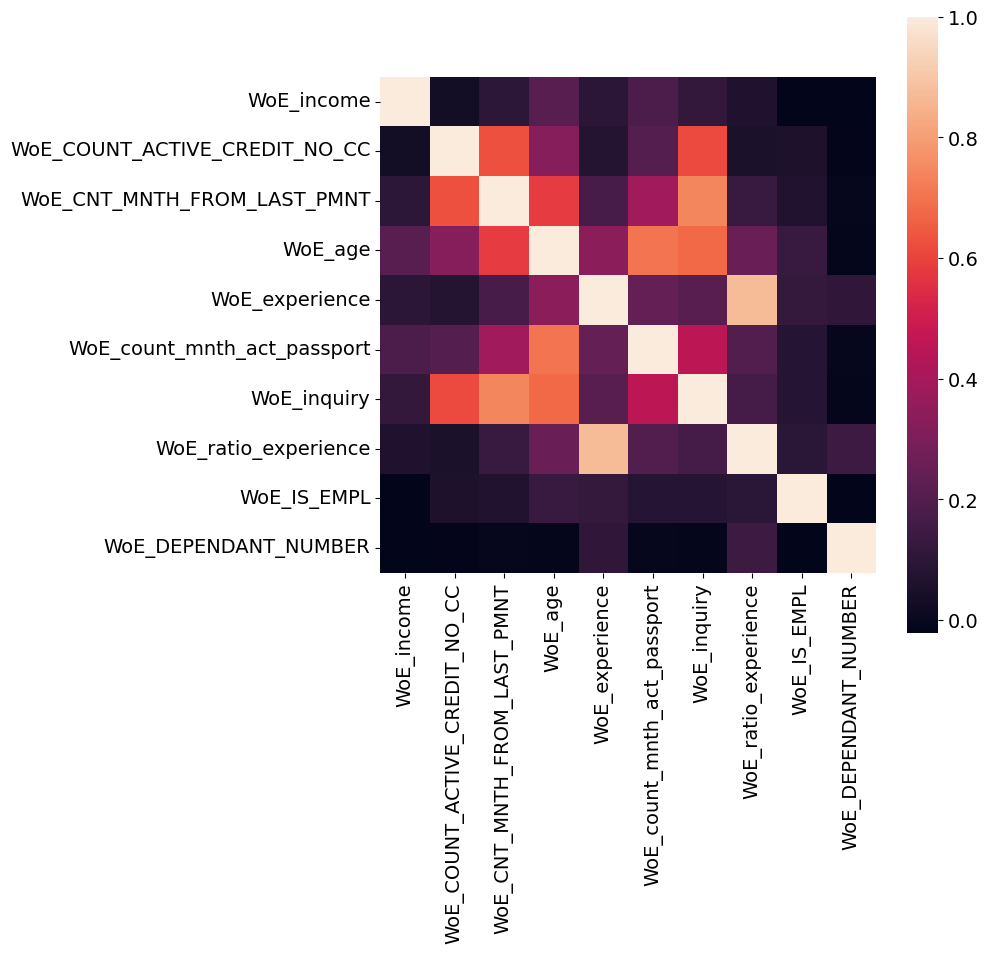

In [ ]:
correlations_woe = train.select_dtypes(include=['float64']).corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlations_woe, square=True)
plt.show()

In [ ]:
features = test.columns.tolist()

features

['target',
 'UID',
 'INCOME_TYPE_2NDFL',
 'INCOME_TYPE_OTHER',
 'EDUCATION__advanced',
 'EDUCATION__beginner',
 'EDUCATION__elementary',
 'EDUCATION__high',
 'CUSTOMER_CATEGORY__Corporate',
 'CUSTOMER_CATEGORY__VIP',
 'CUSTOMER_CATEGORY__basic_category',
 'WoE_income',
 'WoE_COUNT_ACTIVE_CREDIT_NO_CC',
 'WoE_CNT_MNTH_FROM_LAST_PMNT',
 'WoE_age',
 'WoE_experience',
 'WoE_count_mnth_act_passport',
 'WoE_inquiry',
 'WoE_ratio_experience',
 'WoE_IS_EMPL',
 'WoE_DEPENDANT_NUMBER']

In [ ]:
X_train = train[features]
X_test = test[features]
y_train = train['target']
y_test = test['target']

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
features_coefs = pd.DataFrame(zip(X_train.columns, np.transpose(logreg.coef_.tolist()[0])),
                              columns=['features', 'coef'])

intercept = logreg.intercept_
print('intercept=', intercept)
features_coefs

intercept= [-5.29485025]


,features,coef
0,target,18.697694
1,UID,0.000008
2,INCOME_TYPE_2NDFL,-3.778026
3,INCOME_TYPE_OTHER,-1.494457
4,EDUCATION__advanced,-2.379804
5,EDUCATION__beginner,-0.446454
6,EDUCATION__elementary,-1.726732
7,EDUCATION__high,-0.719494
8,CUSTOMER_CATEGORY__Corporate,-3.867810
9,CUSTOMER_CATEGORY__VIP,0.051901


In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


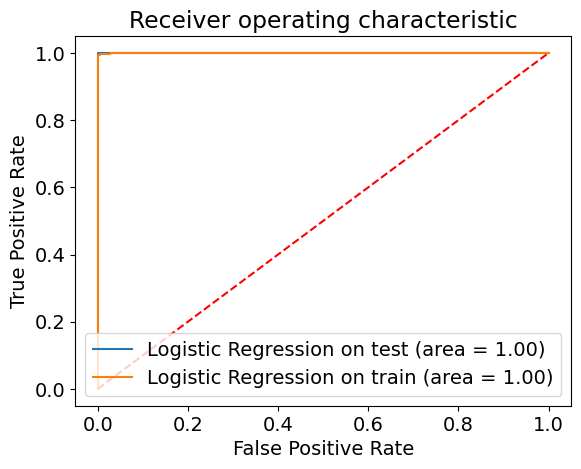

In [ ]:
plt.rc("font", size=14)


logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])



logit_roc_auc_train = roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression on test (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr_train, tpr_train, label='Logistic Regression on train (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
print('precision', precision_score(y_pred, y_test))
print('recall   ', accuracy_score(y_pred, y_test))

precision 0.9946686976389947
recall    0.9990751445086705


In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
gmeans = np.sqrt(tpr + (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.150491, G-Mean=1.412


In [ ]:
cutoff = thresholds[ix]
predictions_01 = np.where(logreg.predict_proba(X_test)[:,1] > cutoff, 1, 0)

In [ ]:
scorecard['features'] = 'WoE_'+scorecard['feature'].astype(str)
scorecard = scorecard.merge(features_coefs,how='inner', on='features')
scorecard = scorecard.drop(columns = 'features')
scorecard

,feature,Value,WoE,coef
0,income,"(-0.001, 15000.0]",-1.321637,1.506103
1,income,"(15000.0, 18000.0]",-1.256986,1.506103
2,income,"(20388.9, 22938.2]",-1.179771,1.506103
3,income,"(18000.0, 20388.9]",-1.133943,1.506103
4,income,"(25000.0, 27350.8]",-1.111552,1.506103
...,...,...,...,...
131,DEPENDANT_NUMBER,4.0,0.000000,-2.034495
132,DEPENDANT_NUMBER,3.0,0.000000,-2.034495
133,DEPENDANT_NUMBER,0.0,0.004340,-2.034495
134,DEPENDANT_NUMBER,1.0,0.310106,-2.034495


In [ ]:
pdo = 20
Target_Odds = 50
Target_Score = 600
Factor = pdo/np.log(2)
Offset = Target_Score-(Factor*np.log(Target_Odds))
print(Factor, Offset)

28.85390081777927 487.1228762045055


In [ ]:
scorecard['score'] = (-1)*(scorecard['coef']*scorecard['WoE'] + intercept/13)*Factor + Offset/13
scorecard['score'] = scorecard['score'].round(0)
scorecard['WoE'] = scorecard['WoE'].round(2)
scorecard['coef'] = scorecard['coef'].round(2)
scorecard

,feature,Value,WoE,coef,score
0,income,"(-0.001, 15000.0]",-1.32,1.51,107.0
1,income,"(15000.0, 18000.0]",-1.26,1.51,104.0
2,income,"(20388.9, 22938.2]",-1.18,1.51,100.0
3,income,"(18000.0, 20388.9]",-1.13,1.51,99.0
4,income,"(25000.0, 27350.8]",-1.11,1.51,98.0
...,...,...,...,...,...
131,DEPENDANT_NUMBER,4.0,0.00,-2.03,49.0
132,DEPENDANT_NUMBER,3.0,0.00,-2.03,49.0
133,DEPENDANT_NUMBER,0.0,0.00,-2.03,49.0
134,DEPENDANT_NUMBER,1.0,0.31,-2.03,67.0
